# Numerical approximation

- - - - - - - - - - - - - - -

Numerical approximation is the field that deploys computer algorithms to find a certain answer or set of answers of a series of equations up to an acceptable error tolerance, which is numerical variation allowed in results. The following topics will be covered:
- Least squares fitting
    - Linear
    - Nonlinear
        - Polynomial
        - Euler
    - Trigonometric
- Fast Fourier transform
- Power iteration
- Wielandt deflation
- QR decomposition
- Householder transformation

Further readings and useful links are also provided at the bottom.

- - - - - - - - - - - - - - -

### Least squares fitting

Least squares fitting is an algorithm at finding the best-fitting curve given a set of points by minimising the sum of the squares of the offsets of the points from the curve.

Official definition here: https://mathworld.wolfram.com/LeastSquaresFitting.html

The idea is, once with enough data points, it's easy to model the curve and provide predictions. This is very, very useful in statistics

In [1]:
from pprint import pprint
import numpy as np
import sympy as sp
from numpy import linalg as LA
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import pandas as pd

#### Linear

In [2]:
def linearLeastSquares(x, y):
    '''The linear least-squares algorithm is already part of Numpy's library:'''
    '''https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html'''
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    return m, c

x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 3, 6])

The following chart displays the given points and its linear fit.

For y = mx + c
m, c
array([1.6, 0.6])


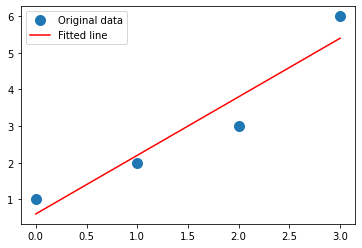

In [3]:
m, c = linearLeastSquares(x, y)

print('For y = mx + c')
print('m, c')
pprint(np.array([m, c]))

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

#### Polynomial

In [4]:
def nonlinearPLeastSquares(x, y):
    '''The nonlinear least-squares algorithm can be reduced to the polyfit function, which is already part of Numpy's library:'''
    '''https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html?highlight=polyfit#numpy.polyfit'''
    curve = np.polyfit(x, y, 2)
    return curve

x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 3, 6])

The following chart displays the given points and its polynomial fit.

For y = Ax^2 + Bx + C
A, B, C
array([0.5, 0.1, 1.1])


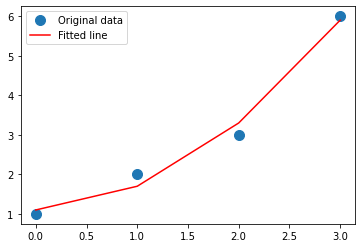

In [5]:
curve = nonlinearPLeastSquares(x, y)

print('For y = Ax^2 + Bx + C')
print('A, B, C')
pprint(curve)

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, curve[0]*x**2 + curve[1]*x + curve[2], 'r', label='Fitted line')
plt.legend()
plt.show()

#### Euler

In [6]:
def nonlinearELeastSquares(x, y):
    '''For the Euler function, we need to find the length of the array and the natural log of y.'''
    m = len(x)
    ln_y = np.log(y)
    xln_y = x*np.log(y)

    '''Variables a and b are dependent on the summations of the following functions.'''
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    x2_sum = np.sum(x**2)
    ln_y_sum = np.sum(ln_y)
    xln_y_sum = np.sum(xln_y)

    '''a is defined as (m*SUM(xln_y) - SUM(x)*SUM(ln_y))/(m*SUM(x**2) - (SUM(x)**2)).'''
    a = (m*xln_y_sum - x_sum*ln_y_sum)/(m*x2_sum - (x_sum)**2)
    
    '''ln(b) is defined as (SUM(x**2)*SUM(xln_y) - SUM(x*ln(y))*SUM(x))/(m*SUM(x**2) - (SUM(x)**2)).'''
    ln_b = (x2_sum*ln_y_sum - xln_y_sum*x_sum)/(m*x2_sum - (x_sum)**2)
    '''where b is e**(ln(b)).'''
    b = np.exp(ln_b)

    return a, b

x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 3, 6])

The following chart displays the given points and its Euler fit.

For y = b*e^(ax)
A, B
array([0.57807435, 1.02918601])


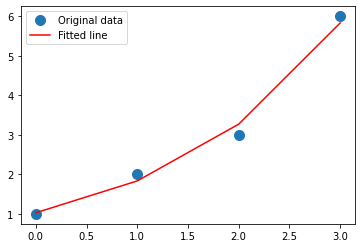

In [7]:
a, b = nonlinearELeastSquares(x, y)

print('For y = b*e^(ax)')
print('A, B')
pprint(np.array([a, b]))

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, b*np.exp(a*x), 'r', label='Fitted line')
plt.legend()
plt.show()

#### Trigonometric

In [8]:
def trigonometricLeastSquares(f_1, f_2, degree = 2):
    a_n = np.zeros([])
    b_n = np.zeros([])
    
    '''For the trigonometric least-squares algorithm, the following integrations will be used. This is where the scipy library is called.'''
    for i in range(degree + 1):    
        a = ((1/np.pi)*integrate.quad(lambda x: f_1[0]*(np.cos(i*x)), f_1[1], f_1[2])[0])+((1/np.pi)*integrate.quad(lambda x: f_2[0]*(np.cos(i*x)), f_2[1], f_2[2])[0])
        a_n = np.insert(a_n, i, a)

    for j in range(degree):
        b = ((1/np.pi)*integrate.quad(lambda x: f_1[0]*(np.sin(i*x)), f_1[1], f_1[2])[0])+((1/np.pi)*integrate.quad(lambda x: f_2[0]*(np.sin(j*x)), f_2[1], f_2[2])[0])
        b_n = np.insert(b_n, j, b)

    return a_n, b_n

f_1 = np.array([0, -np.pi, np.pi/4])
f_2 = np.array([3, np.pi/4, np.pi])

The following chart displays the given points and its trigonometric fit.

Solution:
array([ 2.25      , -0.67523724, -0.47746483,  0.        ])


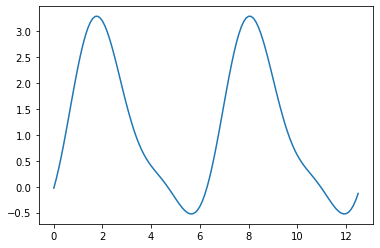

In [9]:
'''The degree here is set to 2, though it can be set higher if there's a need for it.'''
solution = trigonometricLeastSquares(f_1, f_2, degree = 2)

print('Solution:')
pprint(solution[0])

'''Note: solution[0] is a_n and solution[1] is b_n.'''
x = np.arange(0, 4*np.pi, 0.1) ##start, stop, step
y = (1/2)*solution[0][0] + solution[0][1]*np.cos(x) + solution[1][1]*np.sin(x) + solution[0][2]*np.cos(2*x)

plt.plot(x,y)
plt.show()

### Fast Fourier transform

Fast Fourier transform is an algorithm designed to reduce the number of computations needed for <i>N</i> points from $2N^2$ to $2N(log_2N)$.

Official definition here: https://mathworld.wolfram.com/FastFourierTransform.html

The formula can be expressed as:
- $a_k = \sum_{j=0}^{2m-1}{f(x_j)cos(kx_j)}$
- $b_k = \sum_{j=0}^{2m-1}{f(x_j)sin(kx_j)}$

and
- $S_m(x) = \dfrac{a_0 + a_mcos(mx)}{2} + \sum_{k=1}^{m-1}{a_kcos(kx) + b_ksin(kx)}$

where $a_k$ and $b_k$ are the coefficients for $S_m(x)$.

In [10]:
def fftcosine(m):
    '''Setting up a to be a list where the length is dependent on the degrees and how many values come out of the standard formula.'''
    a = [0]*(2*m-1)
    
    '''a_k is defined to be the summation of f(x_j)*(cos(k*x_j)) from j=0 to 2m-1.'''
    for k in range(2*m-1):
        for j in range(2*m):
            x = -np.pi + (j*np.pi)/m
            a_k = (1/2)*((x**2)*np.cos(k*x))
            a[k] += a_k
            
    return a

def fftsine(m):
    '''Setting up b to be a list where the length is dependent on the degrees and how many values come out of the standard formula.'''
    b = [0]*(2*m-2)
    
    '''b_k is defined to be the summation of f(x_j)*(sin(k*x_j)) from j=0 to 2m-1.'''
    for k in range(2*m-2):
        for j in range(2*m):
            x = -np.pi + (j*np.pi)/m
            b_k = (1/2)*((x**2)*np.sin(k*x))
            b[k] += b_k
            
    return b

def fft(m, a, b):
    '''S_m(x) = (a_0 + a_m*cos(mx))/2 + (summation) of (a_k*cos(kx) + b_k*sin(kx)) from k=1 to m-1.'''
    S_1 = '({} + {}*cos{}x)/2'.format(a[0], a[0], m)
    S_2 = '{}*cos(x)+{}*sin(x)'.format(a[1], b[1])
    S = '{} + {}'.format(S_1, S_2)
    
    return S

'''Setting the degree to be 2.'''
m = 2

'''Breaking up the Fast Fourier transform process into its sine and cosine parts before putting them back together.'''
a = fftcosine(m)
b = fftsine(m)
solution = fft(m, a, b)

The following chart displays the FFT given the domains provided.

Solution:
(7.402203300817019 + 7.402203300817019*cos2x)/2 + -4.934802200544679*cos(x)+-6.661338147750939e-16*sin(x)


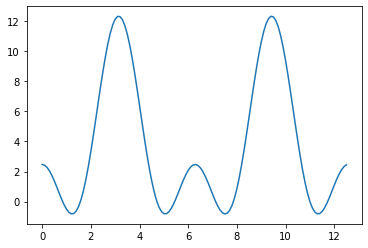

In [11]:
print('Solution:')
print(solution)

'''Note: solution[0] is a_n and solution[1] is b_n. This formula is the standard one, and the graphing is down below.'''
x = np.arange(0,4*np.pi,0.1) ##start, stop, step
y = (1/2)*(a[0] + a[0]*np.cos(2*x)) + a[1]*np.cos(x) + b[1]*np.sin(x)

plt.plot(x,y)
plt.show()

### Power iteration

The power method is used to find the largest eigenvalue by multiplying a matrix repeatedly. The matrix has to be diagonalisable and the vector has to be nonzero. 

Official definition here: http://web.mit.edu/18.06/www/Spring17/Power-Method.pdf

The method also converges very slowly.

In [12]:
def PowerMethod(A, b, step = 25):
    
    '''Let b be the starting vector, and for this example, it'll be done in 25 steps.'''
    results = []
    
    for i in range(step):
        '''Updates p as the max value of the array and this is needed to be done through every iteration.'''
        p = np.amax(b)
        
        '''Resets b after dividing the array with the max value.'''
        b = b/p
        
        '''Dot product of the original matrix A and the updated array b.'''
        b = np.dot(A, b)
        
        results.append(b)
    
    return results

A = np.array([[0,2,1],[1,1,0],[3,0,2]])
b = np.array([0,2,1])

solution = PowerMethod(A, b, step = 25)

df = pd.DataFrame(solution/np.linalg.norm(solution))
df.rename(columns = {0:'x_1',1:'x_2',2:'x_3'}, inplace = True)
df

,x_1,x_2,x_3
0,0.138409,0.055364,0.055364
1,0.066436,0.077509,0.210382
2,0.096158,0.037880,0.163177
3,0.081068,0.045477,0.208602
4,0.079503,0.033586,0.175274
5,0.076581,0.035721,0.186065
6,0.076621,0.033415,0.179087
7,0.076024,0.034017,0.181788
8,0.076083,0.033513,0.180187
9,0.075958,0.033674,0.180859


The following chart displays numerical convergence throughout the iterations.

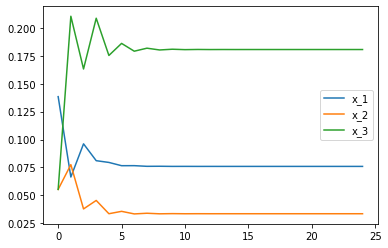

In [13]:
df.plot();

### Wielandt deflation

Deflation techniques are used to calculate the next eigenvalue after solving for the previous one of the largest modulus. Wieladnt deflation is one of those methods.

Official definition here (4.2.1): https://www-users.cs.umn.edu/~saad/eig_book_2ndEd.pdf

This method can be applied to several vectors.

In [14]:
def original_eigenvectors(A):
    '''Converting the numpy matrix to the sympy matrix.'''
    '''This is done because numpy's eigenvectors are normalised and sympy's eigenvectos aren't, and we need the non-normalised ones.'''
    A = sp.Matrix([[A[0][0],A[0][1],A[0][2]],[A[1][0],A[1][1],A[1][2]],[A[2][0],A[2][1],A[2][2]]])

    '''Evaluates the eigenvalues.'''
    A_val = A.eigenvals()
    
    '''Evaluates the non-normalised eigenvectors.'''
    A_vec  = A.eigenvects()
    A_vec1 = np.array(A_vec[0][2], dtype=float)
    A_vec2 = np.array(A_vec[1][2], dtype=float)
    A_vec3 = np.array(A_vec[2][2], dtype=float)
    
    return A_val, A_vec1, A_vec2, A_vec3

def WielandtDeflation(A_val, A_vec1, A_vec2, A_vec3):
    '''Finds all the eigenvalues and picks out the most dominant one.'''
    eigval = LA.eigvals(np.array(A))
    dom_eigval = np.amax(eigval)

    '''x is defined as 1/lambda(dominant_eigenvalue)*(A[first row]).'''
    x = np.array([A[0],A[0],A[0]])
    x = (1/dom_eigval)*x

    '''v is defined as the eigenvector tied to the dominant eigenvalue.'''
    '''This is only transformed into a matrix for matrix multiplication later on.'''
    v = np.array([A_vec3[0],A_vec3[0],A_vec3[0]])
    v = np.transpose(v)

    '''Matrix multiplication. The 2 is there to make sure the multiplication is right. It isn't doing it correctly for some reason.'''
    lambda_vx = np.dot(v,x)*2

    '''B is defined as A-lambda*v*x**(T) where x**(T) is the transpose of x.'''
    B = A - lambda_vx
    
    '''B' is defined as the B matrix but with the 1st row and column deleted.'''
    B_prime = np.array([B[1][1:],B[2][1:]])
    
    '''Once again finding the dominant eigenvalue of the newly deflated matrix.'''
    deflated_eigval = LA.eigvals(np.array(B_prime))
    dom_deflated_eigval = np.amax(deflated_eigval)
    
    return v, x, B_prime, dom_eigval, dom_deflated_eigval

def deflated_eigenvectors(B_prime, dom_deflated_eigval):
    '''Converting the numpy matrix to the sympy matrix again.'''
    '''This is done because numpy's eigenvectors are normalised and sympy's eigenvectors aren't, and we need the non-normalised ones.'''
    B_prime = sp.Matrix([[B_prime[0][0],B_prime[0][1]],[B_prime[1][0],B_prime[1][1]]])
    
    '''Evaluates the non-normalised eigenvectors once again.'''
    B_prime_vec  = B_prime.eigenvects()
    B_prime_vec1 = np.array(B_prime_vec[0][2], dtype=float)
    B_prime_vec2 = np.array(B_prime_vec[1][2], dtype=float)
    
    return B_prime_vec1, B_prime_vec2

def wielandtprocess(v, x, dom_eigval, dom_deflated_eigval, B_prime_vec1, B_prime_vec2):
    '''Reconverting the sympy matrix back to the numpy matrix.'''
    '''A zero must be added back to the component at the beginning.'''
    w2 = np.array([0, B_prime_vec2[0][0], B_prime_vec2[0][1]])
    w2 = np.transpose(np.array([w2, w2, w2]))

    '''v2 is defined as (original lambda - deflated lambda)*w2 - lambda*(x*w2)*v'''
    lambdalambdaw2 = np.transpose((dom_deflated_eigval - dom_eigval)*w2)
    lambdaxw2v = np.transpose(dom_eigval*(np.dot(x[0],w2))*v)
    
    '''The original answer returns a matrix, but we only need any row from it.'''
    v2 = (lambdalambdaw2[0]+lambdaxw2v[0])

    return v2

A = np.array([[4,-1,1],[-1,3,-2],[1,-2,3]])

A_val, A_vec1, A_vec2, A_vec3 = original_eigenvectors(A)
v, x, B_prime, dom_eigval, dom_deflated_eigval = WielandtDeflation(A_val, A_vec1, A_vec2, A_vec3)
B_prime_vec1, B_prime_vec2 = deflated_eigenvectors(B_prime, dom_deflated_eigval)
v2 = wielandtprocess(v, x, dom_eigval, dom_deflated_eigval, B_prime_vec1, B_prime_vec2)

print('Solution:')
pprint(v2)

Solution:
array([ 2.,  1., -1.])


### QR decomposition

The QR decomposition method is a form of matrix decomposition that turns a matrix <i>A</i> into a product of
- $A = QR$

where <i>Q</i> is an orthogonal matrix and <i>R</i> is an upper triangular matrix.

Official definition here: https://mathworld.wolfram.com/QRDecomposition.html

This method is often used to solve linear least squares problems.

In [15]:
def QR(A):
    '''This is to calculate theta, where the equation is a_21 => -3sin(theta) + cos(theta) = 0.'''
    '''Values selected from the matrix are part of the formula.'''
    '''Since only sine and cosine are used here, inverse tangent will find the theta value.'''
    theta = np.arctan(A[1][0]/A[0][0])
    
    '''Values for cos and sin.'''
    cos = np.cos(theta)
    sin = np.sin(theta)
    
    '''Setting up the dot product for P_2 and A.'''
    P_2 = np.array([[cos,sin,0],[-sin,cos,0],[0,0,1]])
    P_2A = np.dot(P_2, A)
    
    '''Setting up A_2 so we can find s_3 and c_3.'''
    A_2 = P_2A
    s_3 = (A_2[2][1])/np.sqrt((A_2[1][1])**2+(A_2[2][1])**2)
    c_3 = (A_2[1][1])/np.sqrt((A_2[1][1])**2+(A_2[2][1])**2)
    
    '''Setting up P_3 so we can find the dot product of R and Q.'''
    P_3 = np.array([[1,0,0],[0,c_3,s_3],[0,-s_3,c_3]])
    
    '''Setting up new A with the dot product of R and Q.'''
    R = np.dot(P_3,A_2)
    Q = np.dot(np.transpose(P_2),np.transpose(P_3))
    
    '''Only doing one step.'''
    new_A = np.dot(R,Q)
    return new_A
    
A = np.array([[3,1,0],[1,3,1],[0,1,3]])

solution = QR(A)

print('Solution:')
pprint(solution)

Solution:
array([[ 3.60000000e+00,  8.60232527e-01, -1.11022302e-16],
       [ 8.60232527e-01,  3.12972973e+00,  8.97403120e-01],
       [-3.51083347e-17,  8.97403120e-01,  2.27027027e+00]])


### Householder transformation

The Householder transformation method takes a vector and reflects it over a plane, and uses this to form the tridiagonal and symmetric matrix. Construct the Householder matrix:
- $P = I - 2(v \otimes w) = I - 2vv^{H}$

Official definition here: https://mathworld.wolfram.com/HouseholderMatrix.html

So we can continue the process defined as:
- $A_{k+1} = P_{k}A_{k}P_{k}$

In [16]:
def Householder(A, alpha = 0):
    '''Let A be the starting matrix and alpha be set to empty so it can accrue.'''

    for k in range(2):
        '''We are doing two steps so that we end up on A(3) at the end.'''
        
        '''The is the summation of the values of the array.'''
        '''The 1st step skips the 1st value, starts with the 2nd and finished until the end.'''
        '''Each step after drops the next value and finishes to the end.'''
        for i in range(k+1,len(A[0])):
            alpha += (A[i][k])**2

        '''The value on the array is ever-moving diagonally downwards, with the negative sign always a constant.'''
        '''After that, square root the summation of alpha values for the new alpha value.'''
        alpha = -(A[k+1][k])*np.sqrt(alpha)
        
        '''r is defined as ((1/2)*alpha**2 - (1/2)A(k+1,k)*alpha)**(1/2).'''
        r = np.sqrt((0.5)*alpha**2-(0.5)*alpha*(A[k+1][k]))
        
        '''The difference between w_1 and w_2 is by the steps of the algorithm. Like alpha, subsequent steps skips over the next value with the 1st value always skipped.'''
        '''This is originally an array, but it has been changed into a matrix for upcoming multiplication.'''
        w_1 = np.array([[0,((A[1][0]-alpha)/(2*r)),(A[2][0]/(2*r)),(A[3][0]/(2*r))],[0,((A[1][0]-alpha)/(2*r)),(A[2][0]/(2*r)),(A[3][0]/(2*r))],[0,((A[1][0]-alpha)/(2*r)),(A[2][0]/(2*r)),(A[3][0]/(2*r))],[0,((A[1][0]-alpha)/(2*r)),(A[2][0]/(2*r)),(A[3][0]/(2*r))]])
        w_2 = np.array([[0,0,((A[k+1][k]-alpha)/(2*r)),(A[k+2][k]/(2*r))],[0,0,((A[k+1][k]-alpha)/(2*r)),(A[k+2][k]/(2*r))],[0,0,((A[k+1][k]-alpha)/(2*r)),(A[k+2][k]/(2*r))],[0,0,((A[k+1][k]-alpha)/(2*r)),(A[k+2][k]/(2*r))]])
        
        '''The following depends on the step.'''
        if k == 0:
            P = np.diag([1,1,1,1]) - 2*w_1*np.transpose(w_1)
        else:
            P = np.diag([1,1,1,1]) - 2*w_2*np.transpose(w_2)
        
        '''Use A(k+1) = P(k)A(k)P(k) to finish up the step where everything is done through the dot product.'''
        A = np.dot(np.dot(P,A),P)
        
        '''Resetting the alpha value.'''
        alpha = 0
        
        print(f'Tridiagonal form: Step {k+1}.')
        print(A)
        print()

A = np.array([[4,1,-2,2],[1,2,0,1],[-2,0,3,-2],[2,1,-2,-1]])
solution = Householder(A, alpha = 0)

Tridiagonal form: Step 1.
[[ 4.00000000e+00 -3.00000000e+00  6.66133815e-16 -6.66133815e-16]
 [-3.00000000e+00  3.33333333e+00  1.00000000e+00  1.33333333e+00]
 [ 6.66133815e-16  1.00000000e+00  1.66666667e+00 -1.33333333e+00]
 [-6.66133815e-16  1.33333333e+00 -1.33333333e+00 -1.00000000e+00]]

Tridiagonal form: Step 2.
[[ 4.00000000e+00 -3.00000000e+00  1.33226763e-16 -9.32587341e-16]
 [-3.00000000e+00  3.33333333e+00 -1.66666667e+00 -2.33146835e-15]
 [ 1.33226763e-16 -1.66666667e+00 -1.32000000e+00  9.06666667e-01]
 [-9.32587341e-16 -2.10942375e-15  9.06666667e-01  1.98666667e+00]]



## Further readings:
General Q&A over least squares:<br>
https://www.quora.com/What-are-the-uses-of-least-square-method

Fast Fourier transform and audio compression:<br>
http://www.math.utah.edu/~gustafso/s2012/2270/web-projects/Guckert-audio-compression-svd-mdct-MP3.pdf

Uses of eigenvalues and eigenvectors in image processing:<br>
https://medium.com/swlh/applications-of-linear-algebra-in-image-filters-part-i-operations-aeb64f236845 <br>
https://medium.com/@naghemanth/applications-of-linear-algebra-in-image-filters-part-ii-separable-filters-f4635ea9f94f


## Useful links:
Matrix decomposition calculator:<br>
https://www.atozmath.com/MatrixEv.aspx?q=qrdecomphh